#Framing the problem
We have the data of passengers who boarded the titanic. The titanic ship wrecked and people died. Now with the data that we are having, we need to create a model which will predict the survival of passengers.

#Getting the data

Test and train sets of titanic problem can be found at the below url:
https://www.kaggle.com/competitions/titanic/data

In [2]:
# prompt: how to know which folder we are in right now in colab

!cd sample_data
!pwd

/content


In [23]:
import numpy as np
import pandas as pd

path_train = './drive/MyDrive/Colab Notebooks/titanic/train.csv'
path_test = './drive/MyDrive/Colab Notebooks/titanic/test.csv'
train_set = pd.read_csv(path_train)
test_set = pd.read_csv(path_test)

train_set[:50]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
round((train_set.isnull().sum().sort_values(ascending=False)/len(train_set))*100,1)

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
dtype: float64

In [32]:
test_set.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [35]:
train_set.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [5]:
train_set.columns[train_set.isnull().any()]
train_set.select_dtypes(include=['int64']).columns


Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [6]:
train_set.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [7]:
train_set.select_dtypes(include=['float64']).columns

Index(['Age', 'Fare'], dtype='object')

In [8]:
# x = train_set['Age']
# count=0
# for i in x:
#   if np.isnan(i):
#     count+=1
# print(count)
sum(map(lambda x: pd.isnull(x), train_set['Age']))

177

In [9]:
def getNullPercent(cols)->None:
  for x in cols:
    print(round((train_set[x].isnull().sum()/len(train_set[x]))*100,2))

cols = ['Age', 'Cabin', 'Embarked']
getNullPercent(cols)

19.87
77.1
0.22


#Exploring the training data

Columns having Null values:
1. Age - 19.87%
2. cabin - 77.1%
3. Embarked - 0.22%

columns of int64 data type:
1. PassengerId
2. Survived
3. Pclass
4. SibSp
5. Parch

columns of object data type:
1. Name
2. Sex
3. Ticket
4. Cabin
5. Embarked

columns of float64 datatype:
1. Age
2. Fare



In [10]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train_set_analysis = train_set.copy()
train_set_analysis.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The survived column:

mean is 0.38, representing the proportion of survived people. 38.3% of people survived in train set.

Standard Deviation is 0.48. SD says that how far on average is each data point from the mean. On an average each point is 0.48 units away from the mean in this case. Since the survived column has only 0s and 1s, 0.48 represents high variability in the column. why 0.48 represents high variability? We know for a fact that 0.5 is the max variability in distribution(bernoullis) containing only 0s and 1s. You can think of variability this way: if there are only 0s in the distribution, data has no variability, I mean where ever you look there are only 0s. So, in this case variability is 0. suppose lets say, 0's are 90% and 1's are 10%. In this case there is little variability as we now have few 1s in the distribution. Now, lets say 0's are 50% and 1's are 50%. In this case there are equal number of 0's and 1's. so, we now have max variability. If any number is dominating in a bernoulli distribution variability will be less than 0.5(max variability).

In [12]:
train_set_analysis['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

The Pclass column:

contains 1,2,3 classes representing 1st class, 2nd class and 3rd class. In real life there are generally less 1st class passengers which aligns with the above data.

Mean of the Pclass is 2.3, suggests that most data points are either 2 and 3.

The standard deviation is 0.83 which is less than mean. That means the data points are closely clustered around mean. This means most datapoints are around 2.3.



<Axes: xlabel='Pclass'>

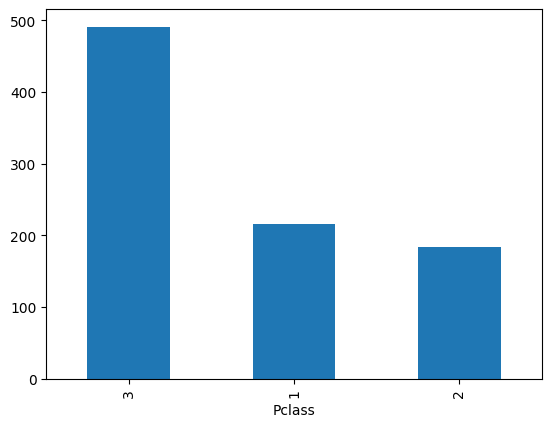

In [13]:
# prompt: how to create a bar graph?

train_set_analysis["Pclass"].value_counts().plot(kind="bar")
# cool thing, we can create a plot from pandas series.

<Axes: xlabel='Age_group'>

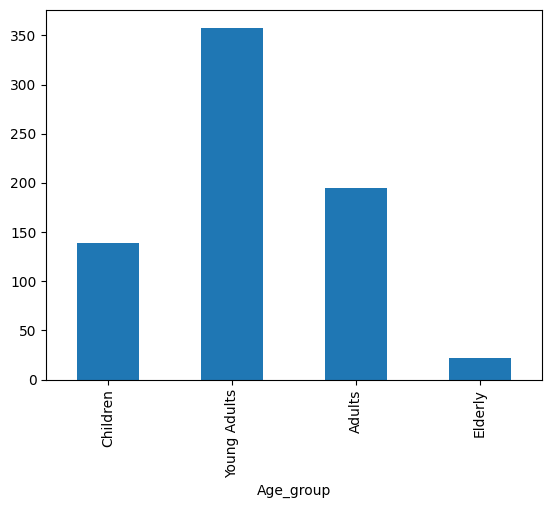

In [14]:
# prompt: how to create a bar graph for train_set["Age"] for different ranges of age
import pandas as pd
train_set_analysis['Age_group'] = pd.cut(train_set_analysis['Age'], bins=[0, 18, 35, 60, 100], labels=['Children', 'Young Adults', 'Adults', 'Elderly'])
train_set_analysis.groupby('Age_group')['Age'].count().plot(kind='bar')
# train_set_analysis.groupby('Age_group')


<Axes: >

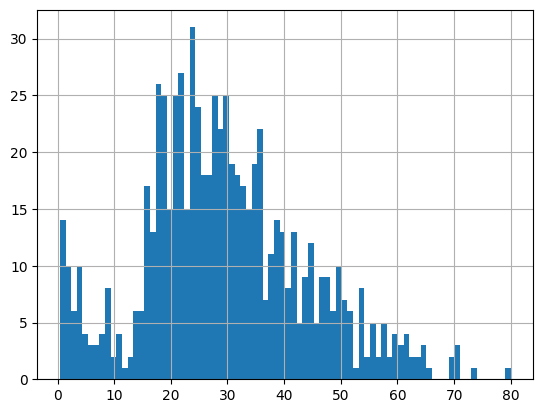

In [15]:
import matplotlib.pyplot as plt

train_set_analysis["Age"].hist(bins=80)

In [16]:
train_set_analysis.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The age column:

Age is having 714 non null rows out of 891 rows. 177 missing values in Age column.

Mean is 29.6 indicating the average age is around 30 indicating most of the people have ages around 30.

SD is 14.5, which is less than the mean, indicating a lot of people are closer to mean.

<Axes: xlabel='SibSp'>

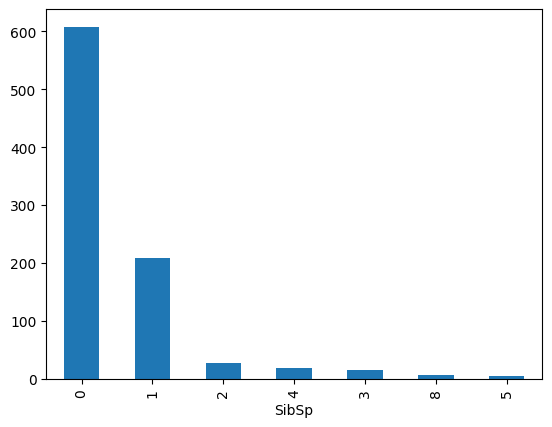

In [17]:
train_set_analysis['SibSp'].value_counts().plot(kind="bar")

<Axes: xlabel='Parch'>

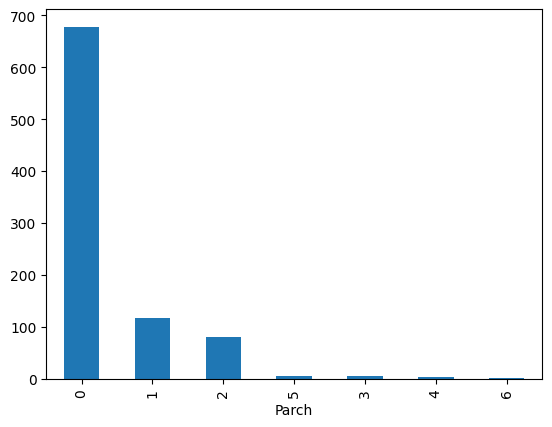

In [18]:
train_set_analysis['Parch'].value_counts().plot(kind="bar")

<Axes: >

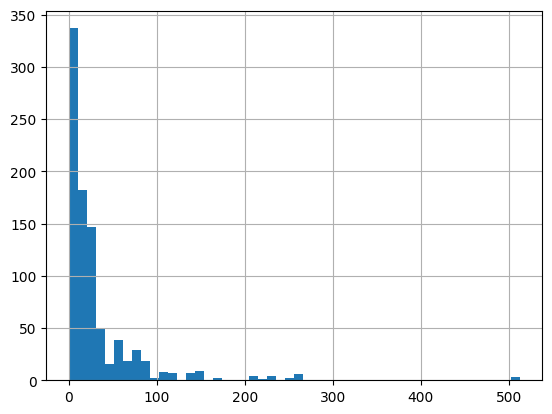

In [19]:
train_set_analysis['Fare'].hist(bins=50)

In [20]:
train_set_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_group    714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


The non float type columns which will be useful for the model would be Sex, Cabin.

In [21]:
# prompt: how to remove agegroup column from dataframe

train_set_analysis = train_set_analysis.drop('Age_group', axis=1)


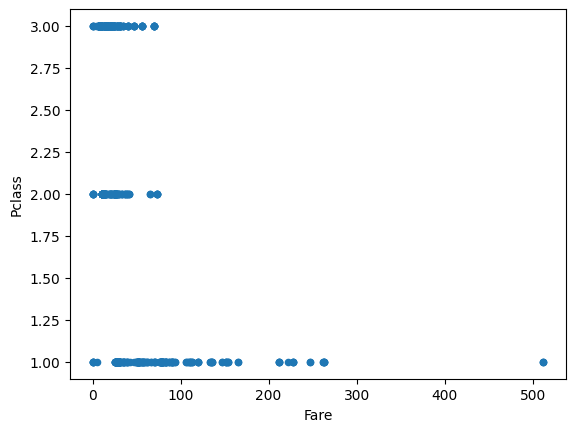

In [24]:
# prompt: draw a plot for train_set['Fare'] and train_set['Pclass']

import matplotlib.pyplot as plt
train_set_analysis.plot.scatter(x='Fare', y='Pclass')
plt.show()


In [36]:
train_set.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [42]:
round(train_set[['Survived', 'Pclass']].groupby("Pclass").mean()*100,1)

,Survived
Pclass,
1,63.0
2,47.3
3,24.2


In [43]:
round(train_set[["Survived", "Sex"]].groupby("Sex").mean()*100,1)

,Survived
Sex,
female,74.2
male,18.9


In [44]:
train_set[["Survived","Sex","Pclass"]].groupby(['Sex', "Pclass"]).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447